# Create a general linear model metamodel

In this example we are going to create a global approximation of a model response using a general linear model. We show how to use the `GeneralLinearModelAlgorithm` class, which estimates the parameters of the model. 

In [1]:
from __future__ import print_function
import openturns as ot

We create a model and a sample from this model.

In [2]:
ot.RandomGenerator.SetSeed(0)
dimension = 2
input_names = ['x1', 'x2']
formulas = ['cos(x1 + x2)']
model = ot.SymbolicFunction(input_names, formulas)
distribution = ot.Normal(dimension)
x  = distribution.getSample(100)
y = model(x)

We create a `GeneralLinearModelAlgorithm` based on a linear basis. The `run` method estimats the coefficients of the trend and the hyperparameters of the covariance model.

In [3]:
basis = ot.LinearBasisFactory(dimension).build()
covarianceModel = ot.SquaredExponential([1]*dimension, [1.0])
algo = ot.GeneralLinearModelAlgorithm(x, y, covarianceModel, basis)
algo.run()
result = algo.getResult()

We see that the trend coefficients have been estimated. 

In [4]:
result.getTrendCoefficients()

[class=Point name=Unnamed dimension=3 values=[-0.227937,-0.0114041,-0.00960703]]

The parameters of the covariance models also have been estimated.

In [5]:
result.getCovarianceModel()

class=SquaredExponential scale=class=Point name=Unnamed dimension=2 values=[1.00028,1.00099] amplitude=class=Point name=Unnamed dimension=1 values=[0.323845]

The `getMetaModel` method returns the metamodel where the parameters have been estimated. 

In [6]:
responseSurface = result.getMetaModel()

Plot the output of our model depending on `x2` with `x1=0.5`.

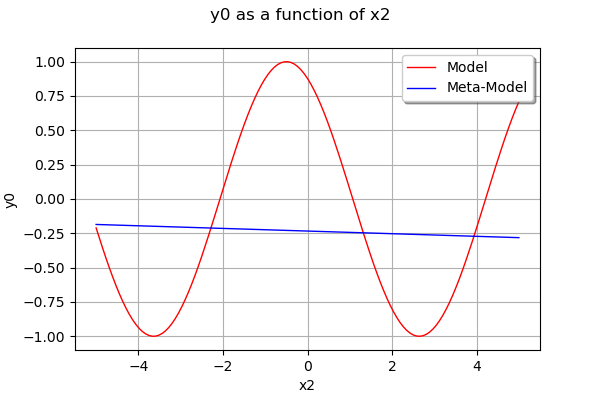

In [7]:
xmin = -5.
xmax = 5.
x1value = 0.5
parametricModelGraph = ot.ParametricFunction(model, [0], [x1value]).draw(xmin,xmax)
parametricModelGraph.setColors(["red"])
graphMetamodel = ot.ParametricFunction(responseSurface, [0], [x1value]).draw(xmin,xmax)
graphMetamodel.setColors(["blue"])
parametricModelGraph.add(graphMetamodel)
parametricModelGraph.setLegends(["Model","Meta-Model"])
parametricModelGraph.setLegendPosition("topright")
parametricModelGraph

We see that the metamodel is equal to the trend because it takes into account the fact that the mean of the gaussian process is zero. 

This `GeneralLinearModelAlgorithm` class is the main building block of the `KrigingAlgorithm`. This is why most basic use cases are based on the `KrigingAlgorithm` instead of the `GeneralLinearModelAlgorithm`, because this allows to condition the gaussian process.